Importing the Library

In [1]:
import tensorflow as tf 
tf.__version__

'2.7.0'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
insurance  = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [5]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Checking null values

In [6]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Problem Statement**: Based of the information given we have predict the price of insurance amount

Categorical to numerical

In [7]:
dummies = pd.get_dummies(insurance)
dummies.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [8]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Let's build a Regression model using neural network

In [9]:
#Data preparation
X = dummies.drop("charges", axis=1)
y = dummies.charges

In [10]:
X.shape,y.shape

((1338, 11), (1338,))

In [11]:
#Splitting the train test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
# Random seed
tf.random.set_seed(42)

#Create a model

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])
insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8792.3945 - mae: 8792.3945
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7460.8208 - mae: 7460.8208
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7745.6284 - mae: 7745.6284
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7471.9688 - mae: 7471.9688
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7489.6309 - mae: 7489.6309
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7501.0161 - mae: 7501.0161
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7544.1855 - mae: 7544.1855
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7512.8330 - mae: 7512.8330
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7566.0513 - mae: 7566.0513
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7688.7227 - mae: 7688.7227

In [13]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7915.7144 - mae: 7915.7144


[7915.71435546875, 7915.71435546875]

Model loss is higher so we are to increase the layer of neural network and change the model

In [14]:
#Set random seed
tf.random.set_seed(42)

#Adding a layer
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])

#Compiling

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

#Fitting a model
history = model_1.fit(X_train, y_train, epochs = 100, verbose =0)

In [15]:
model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5239.5840 - mae: 5239.5840


[5239.583984375, 5239.583984375]

In [16]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               1200      
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


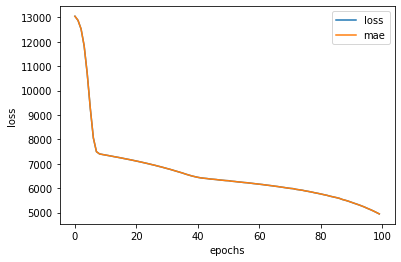

In [17]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss");

In [18]:
# Lets train for some more epoch(100)
history_1 = model_1.fit(X_train, y_train, epochs = 100, verbose = 0)

In [19]:
model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3954.8381 - mae: 3954.8381


[3954.838134765625, 3954.838134765625]

Text(0, 0.5, 'loss')

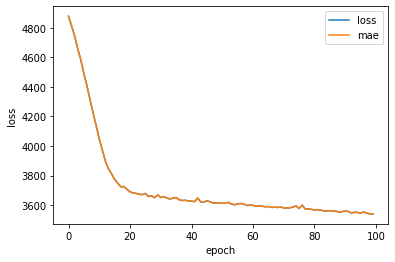

In [20]:
pd.DataFrame(history_1.history).plot()
plt.xlabel("epoch")
plt.ylabel("loss")

By adding extra 100 epoch error almost reduce to half of the prevous exection.

### Training the model with normalisation

In [21]:
#import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
#Preprocessing libraries
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#Spliting into dependent(y) and independent variable(X)
X = insurance.drop("charges", axis = 1)
y = insurance.charges

#Splitting of training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Column tranformer
ct = make_column_transformer(
      (MinMaxScaler(), ["age", "bmi", "children"]),
      (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
      )

#fit column transformer in training data only testing data fits leads to data leakage
ct.fit(X_train)

#Transforming with minmax_scalar and One Hot encoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

Lets check with and without normalised data

In [24]:
#Without normalize
X_train.iloc[5]

age                63
sex              male
bmi             41.47
children            0
smoker             no
region      southeast
Name: 170, dtype: object

In [25]:
#with normalisation - Now our processing is very much higher
X_train_normal[5]

array([0.97826087, 0.68630616, 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        ])

In [26]:
#Setting seed
tf.random.set_seed(42)

#Setting a layers
model_2 = tf.keras.Sequential([
   tf.keras.layers.Dense(100),
   tf.keras.layers.Dense(10),
   tf.keras.layers.Dense(1)#For output layer
   ])

#Compiling
model_2.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["mae"]
               )

#fiting a model
model_2.fit(X_train_normal, y_train, epochs = 200, verbose=0)

In [27]:
model_2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3171.5774 - mae: 3171.5774


[3171.577392578125, 3171.577392578125]

In [28]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               1200      
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


By normalizing without doing much tuning we reduce the almost to 1/3rd 